(100, 2)
[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]


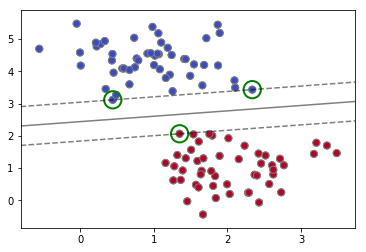

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=100,  centers=2, n_features=2,#features-кол-во линий
            #точки, кол-во центров(локаций), кол-во признаков
                 random_state=0, cluster_std=0.60)
                                #стандартное отклонение кластера
   
print(X.shape)#кол-во элементов признаков
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="grey", s=50, cmap='coolwarm');
            #вывод 2-х признаков, разные цвета, обводка, размер точкиб
print(y)

clf = SVC(kernel='linear', C=1E10)
clf.fit(X,y)


def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim(); # Граници
    ylim = ax.get_ylim();
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    
    
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',
              levels=[-1,0,1], alpha=0.5,
              linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none');        
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s= 300, linewidth=2, edgecolor='green',
                   facecolors='none');
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0],X[:,1],c=y,edgecolor='grey',s=50,cmap='coolwarm')
plot_svc_decision_function(clf)

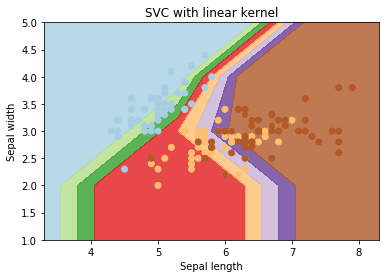

In [14]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np 
# импортируем набор данных (например, возьмём тот же iris)
iris = datasets.load_iris()
X = iris.data[:, :2] # возьмём только первые 2 признака, чтобы проще воспринять вывод
y = iris.target
 
C = 1.0 # параметр регуляризации SVM
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y) # здесь мы взяли линейный kernel

h=1
# создаём сетку для построения графика
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
 
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length') # оси и название укажем на английском
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

/usr/local/lib64/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


IndexError: too many indices for array

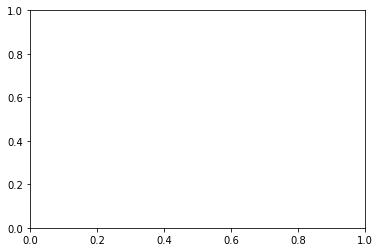

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim(); # Граници
    ylim = ax.get_ylim();
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    
    
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,colors='k',
              levels=[-1,0,1], alpha=0.5,
              linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none');        
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s= 300, linewidth=2, edgecolor='green',
                   facecolors='none');
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    plt.scatter(x[:,0],x[:,1],c=y,edgecolor='grey',s=50,cmap='coolwarm')
    
plot_svc_decision_function(clf)
